With reference to:

https://www.kaggle.com/code/ohseokkim/diabetes-three-ensemble-models

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from joblib import dump
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
# データセットを読み込む
diabetes_df = pd.read_csv('datasets/diabetes.csv')

In [3]:
# データの構造を見る
diabetes_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
# データの要約統計量を見る。
# 平均、標準偏差、最小値、最大値
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


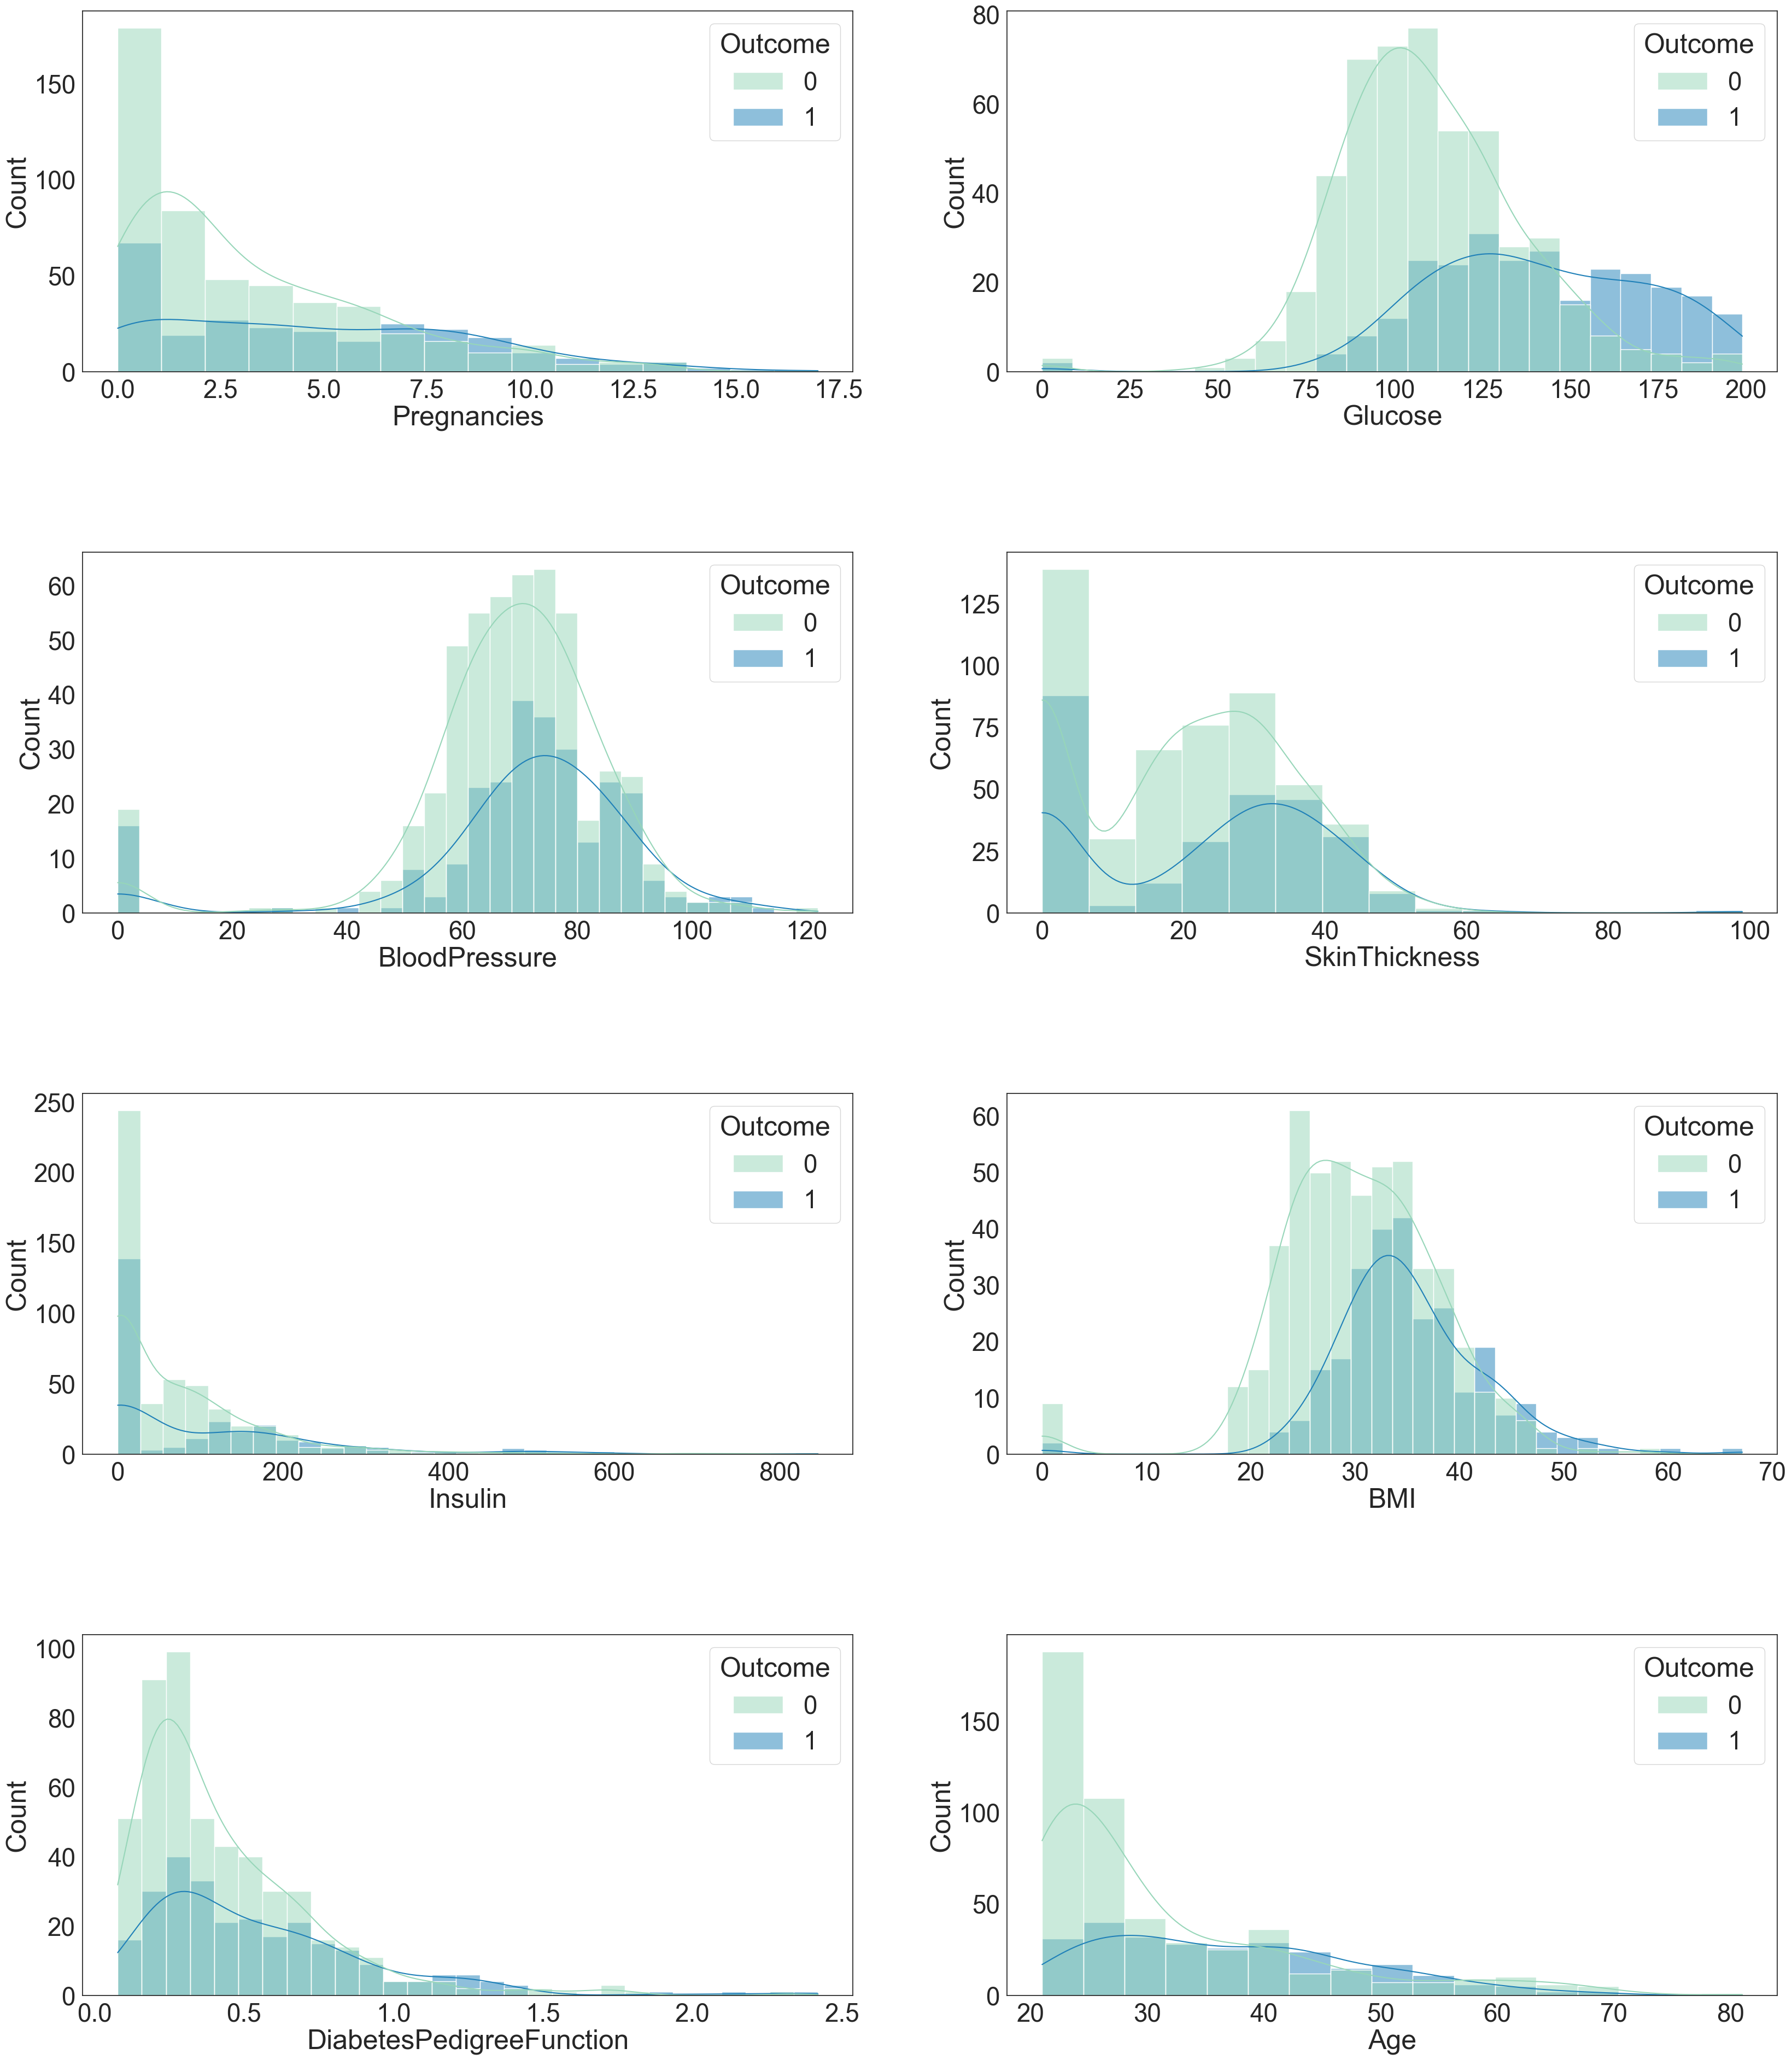

In [5]:
# 特徴量の名前でリストを作成する
feature_names = [cname for cname in diabetes_df.loc[:,:'Age'].columns]

# seabornでデータを可視化する
rcParams['figure.figsize'] = 40,60
sns.set(font_scale = 3)
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.5)
for i, name in enumerate(feature_names):
    plt.subplot(5,2,i+1)
    sns.histplot(data=diabetes_df, x=name, hue="Outcome",kde=True,palette="YlGnBu")

In [6]:
# データセットに関する専門知識を基づいて、どうやってデータの処理すればいいかを判断することは大事。
# 以下のコードは、Glucose, BloodPressure, SkinThickness, InsulinとBMIの値が０だった場合、そのカラムの平均値で置き換える。
# 平均値で置き換えるのは今回の文脈的には正しくない判断かもしれませんが、とりあえずそういう専門知識はないので、こうやります。
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_mean = diabetes_df[zero_features].mean()
diabetes_df[zero_features] = diabetes_df[zero_features].replace(0, diabetes_mean)

In [7]:
diabetes_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.000000,79.799479,33.600000,0.627,50,1
1,1,85.0,66.000000,29.000000,79.799479,26.600000,0.351,31,0
2,8,183.0,64.000000,20.536458,79.799479,23.300000,0.672,32,1
3,1,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,20.536458,79.799479,25.600000,0.201,30,0
6,3,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26,1
7,10,115.0,69.105469,20.536458,79.799479,35.300000,0.134,29,0
8,2,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,20.536458,79.799479,31.992578,0.232,54,1


In [8]:
# DiabetesPedigreeFunctionの重要性が低そうなので、データから削除します。
diabetes_df.drop('DiabetesPedigreeFunction', axis='columns', inplace=True)

In [9]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,33,1


In [10]:
# X: 特徴量
# Y: 正解データ
X = diabetes_df.iloc[:,:-1]
y = diabetes_df.iloc[:,-1]

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    float64
 2   BloodPressure  768 non-null    float64
 3   SkinThickness  768 non-null    float64
 4   Insulin        768 non-null    float64
 5   BMI            768 non-null    float64
 6   Age            768 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 42.1 KB


In [12]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 768 entries, 0 to 767
Series name: Outcome
Non-Null Count  Dtype
--------------  -----
768 non-null    int64
dtypes: int64(1)
memory usage: 6.1 KB


In [13]:
# 学習用データと評価用データに分割します。
# X_train  学習用の特徴量
# X_test   評価用の特徴量
# y_train  学習用の正解データ
# y_test   評価用の正解データ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
X_train.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
357,13,129.0,69.105469,30.000000,79.799479,39.900000,44
73,4,129.0,86.000000,20.000000,270.000000,35.100000,23
352,3,61.0,82.000000,28.000000,79.799479,34.400000,46
497,2,81.0,72.000000,15.000000,76.000000,30.100000,25
145,0,102.0,75.000000,23.000000,79.799479,31.992578,21
514,3,99.0,54.000000,19.000000,86.000000,25.600000,24
291,0,107.0,62.000000,30.000000,74.000000,36.600000,25
132,3,170.0,64.000000,37.000000,225.000000,34.500000,30
559,11,85.0,74.000000,20.536458,79.799479,30.100000,35
631,0,102.0,78.000000,40.000000,90.000000,34.500000,24


In [15]:
y_train.head(10)

357    1
73     0
352    0
497    0
145    0
514    0
291    1
132    1
559    0
631    0
Name: Outcome, dtype: int64

In [16]:
# LogisticRegression, ロジスティック回帰モデルを試す
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(metrics.classification_report(y_test, predictions))
print(model.predict_proba(X_test)[:10])

              precision    recall  f1-score   support

           0       0.77      0.80      0.78       123
           1       0.62      0.58      0.60        69

    accuracy                           0.72       192
   macro avg       0.69      0.69      0.69       192
weighted avg       0.72      0.72      0.72       192

[[0.74630028 0.25369972]
 [0.80244922 0.19755078]
 [0.88251299 0.11748701]
 [0.89212057 0.10787943]
 [0.49732106 0.50267894]
 [0.56226821 0.43773179]
 [0.98862091 0.01137909]
 [0.66921953 0.33078047]
 [0.38359517 0.61640483]
 [0.19118423 0.80881577]]


In [17]:
# Naive Bayes分類用モデルを試す
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(metrics.classification_report(y_test, predictions))
print(model.predict_proba(X_test)[:10])

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       123
           1       0.59      0.62      0.61        69

    accuracy                           0.71       192
   macro avg       0.69      0.69      0.69       192
weighted avg       0.71      0.71      0.71       192

[[0.76838803 0.23161197]
 [0.92033012 0.07966988]
 [0.98088133 0.01911867]
 [0.91733213 0.08266787]
 [0.40462317 0.59537683]
 [0.40211733 0.59788267]
 [0.99842028 0.00157972]
 [0.86434023 0.13565977]
 [0.45044201 0.54955799]
 [0.18583352 0.81416648]]


In [18]:
# ランダムフォレスト分類用モデルを試す
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(metrics.classification_report(y_test, predictions))
print(model.predict_proba(X_test)[:10])

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       123
           1       0.63      0.65      0.64        69

    accuracy                           0.74       192
   macro avg       0.72      0.72      0.72       192
weighted avg       0.74      0.74      0.74       192

[[0.56 0.44]
 [0.68 0.32]
 [0.9  0.1 ]
 [0.83 0.17]
 [0.5  0.5 ]
 [0.44 0.56]
 [0.97 0.03]
 [0.22 0.78]
 [0.46 0.54]
 [0.39 0.61]]


In [19]:
# LogisticRegression, GaussianNB と RandomForestClassifierの試してみたんですが、
# RandomForestClassifierの精度が一番良さそうです。使いましょう。
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
# Test probability prediction using some random values
values = [3, 170, 95, 20, 200, 34, 35]
diabetes_probability = model.predict_proba([values])[0, 1]
columns = diabetes_df.iloc[:,:-1].columns
for i, column in enumerate(columns):
  print(f'{column}: {values[i]}')
print(f'Probability of having diabetes: {diabetes_probability * 100}%')

Pregnancies: 3
Glucose: 170
BloodPressure: 95
SkinThickness: 20
Insulin: 200
BMI: 34
Age: 35
Probability of having diabetes: 85.0%


d:\dev\python-examples\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [21]:
# Ensure temp folder is created
from pathlib import Path
Path('../temp').mkdir(parents=True, exist_ok=True)

# Dump the model to a file
dump(model, '../temp/model.joblib')

['../temp/model.joblib']